<a href="https://colab.research.google.com/github/placeholder2/Heart-Disease-Prediction/blob/main/hd_eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Exploratory Data Analysis**


##**Part I : General Info and Univariate Analysis** 


## **Loading Libraries and Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew,kurtosis,mode,median_absolute_deviation as mad,iqr
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Plotting parameters
plt.rcParams.update({
    "xtick.major.size": 5,
    "xtick.major.pad": 20,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 5,
    "lines.linewidth": 2,
    "lines.color": "g",
    "figure.figsize": (14,7),
    'axes.titlesize': 25,
    'axes.titlepad' : 20,
    'figure.autolayout': True,
})
plt.style.use('bmh')

# List of colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/heart_2020_cleaned.csv')

## **Dataset Description** 

In [ ]:
df.shape

(319795, 18)

In [ ]:
pd.options.display.max_columns = None
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Are there any missing values?


In [ ]:
df.isna().any().sum()

0

Well, the dataset is from kaggle so no suprises here.

Next, let's briefly look at the outliers by compering the IQR score with values in corresponding columns.

In [ ]:
num_cols = df.select_dtypes(exclude=[object])
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
outside = (num_cols < (Q1 - 1.5 * IQR))|(num_cols > (Q3 + 1.5 * IQR))

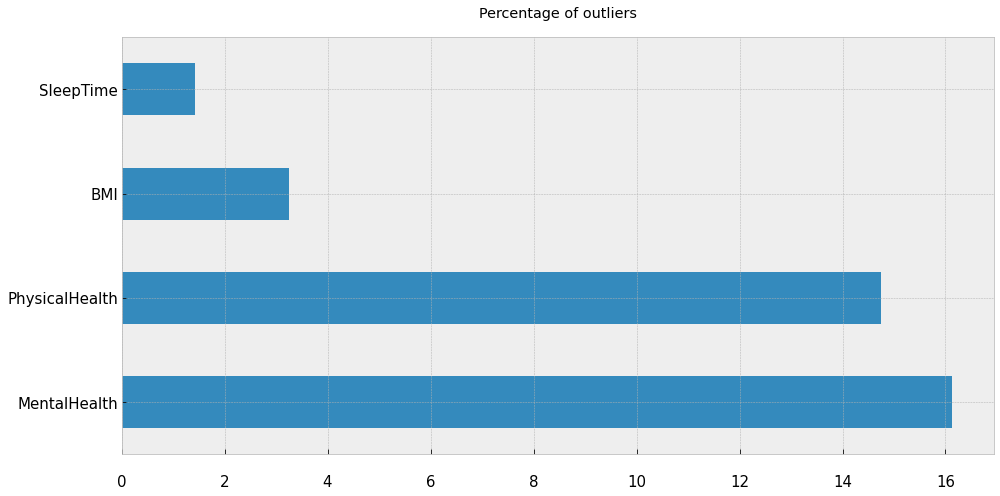

In [ ]:
outside_percentage = (
    outside.sum()
    .div(df.shape[0])
    .multiply(100)
    .sort_values(ascending = False)
)
outside_percentage.plot(kind='barh').set_title('Percentage of outliers')
plt.show()

Seems like there's something going on with physical and mental health columns.

## **Functions**

In [ ]:
def plot_boolbar(col,title,p = colors):
  '''Function creating barplot from given boolean column'''

  plot = sns.countplot(x=col, data=df,palette = p)
  plot.xaxis.set_tick_params(rotation=0)
  plot.set_title(title)
  plt.show()

In [ ]:
def plot_bar(col,title):
  '''Function for plotting bar of non-boolean  variables'''
  
  values = df[col].value_counts().sort_index()
  fig = values.plot(kind = 'bar',title = title)
  fig.xaxis.set_tick_params(rotation=0)
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.show()

In [ ]:
def shape(col):
  '''Function futher describing shape of data in column'''
  
  tab = '\t'
  esc = chr(10)
  sk = skew(df[col],nan_policy = 'omit')
  kurt = kurtosis(df[col],nan_policy = 'omit')
  var = np.var(df[col])
  mode_col = mode(df[col])
  mad_col = mad(df[col],nan_policy = 'omit')
  range = np.max(df[col]) - np.min(df[col])
  print( f'Skewness: {sk}\nKurtosis: {kurt}\nVariation: {var}\
        \nMode: {mode_col}\nMAD: {mad_col}\nRage: {range}')

In [ ]:
def get_bins(col):
  '''Function calculating optimal number of bins based on Freedman–Diaconis rule'''
  n = len(df[col])
  IQR  = iqr(df[col], rng=(25, 75), scale="raw", nan_policy="omit")
  bw = (2 * IQR) / np.power(n, 1/3)
  r = np.max(df[col]) - np.min(df[col])
  result = int((r / bw) + 1)
  return result

def plot_hist(col):
  '''Function plotting histogram'''
  plt.hist(df[col], bins=get_bins(col),density=True)
  plt.axvline(np.mean(df[col]), ls='--', c=colors[1], label="Mean")
  plt.axvline(np.nanmedian(df[col]), ls='solid', c='black', label="Median")
  plt.title(f'{col} Histogram')
  plt.legend()
  plt.xlabel(col) 
  plt.ylabel('frequency') 
  plt.show()

In [ ]:
def plot_violin(col,title,p = colors):
  '''Function creating violin plot from given categorical column'''
  plot = sns.violinplot(x=col, data=df,palette = p)
  plot.set_title(title)
  plot.set_ylabel('frequency')
  plt.show()

 ## **Heart Disease**

Refers to having coronary heart disease (CHD) or myocardial infarction (MI)

In [ ]:
df['HeartDisease'].describe()

count     319795
unique         2
top           No
freq      292422
Name: HeartDisease, dtype: object

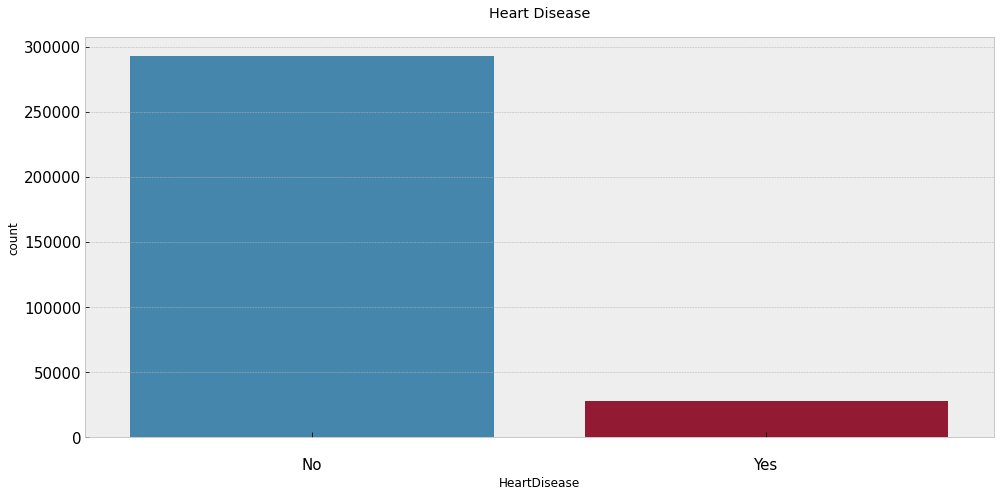

In [ ]:
plot_boolbar('HeartDisease','Heart Disease')

In [ ]:
df['HeartDisease'].value_counts(normalize= True)*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

The target variable is heavily unbalanced.

## **General information**


### **Age Category**

In [ ]:
df['AgeCategory'].describe()

count     319795
unique        13
top        65-69
freq       34151
Name: AgeCategory, dtype: object

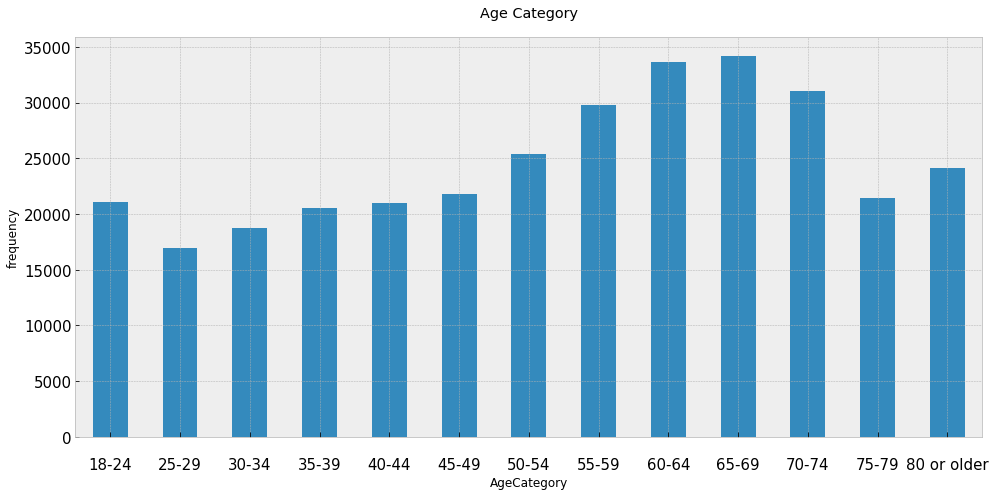

In [ ]:
plot_bar('AgeCategory','Age Category')

Not all of the age groups are of the same interval, so it's best to treat the age groups as a ordinal variable.

### **BMI**

In [ ]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

In [ ]:
shape('BMI')

Skewness: 1.3324243931174096
Kurtosis: 3.889963770419137
Variation: 40.3998834274629        
Mode: ModeResult(mode=array([26.63]), count=array([3762]))
MAD: 5.426316
Rage: 82.83


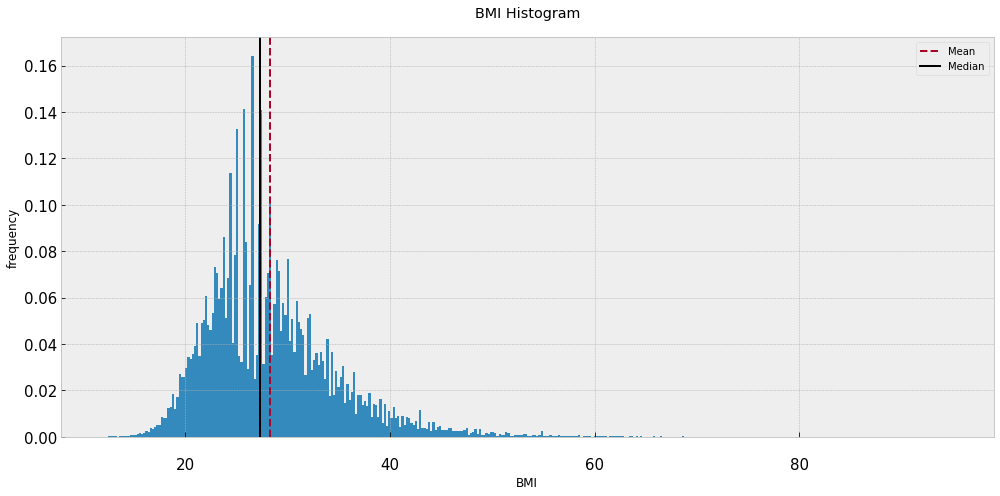

In [ ]:
plot_hist('BMI')

In [ ]:
uw = df["BMI"] < 18.5
n =  (18.5 <= df["BMI"]) & (df['BMI'] < 25)
ow = (25 <= df["BMI"]) & (df['BMI'] < 30)
o = df["BMI"] >= 30

bmi_classes = {
    'underweight' : uw,
    'normal' : n,
    'overweight' : ow,
    'obesity' : o}

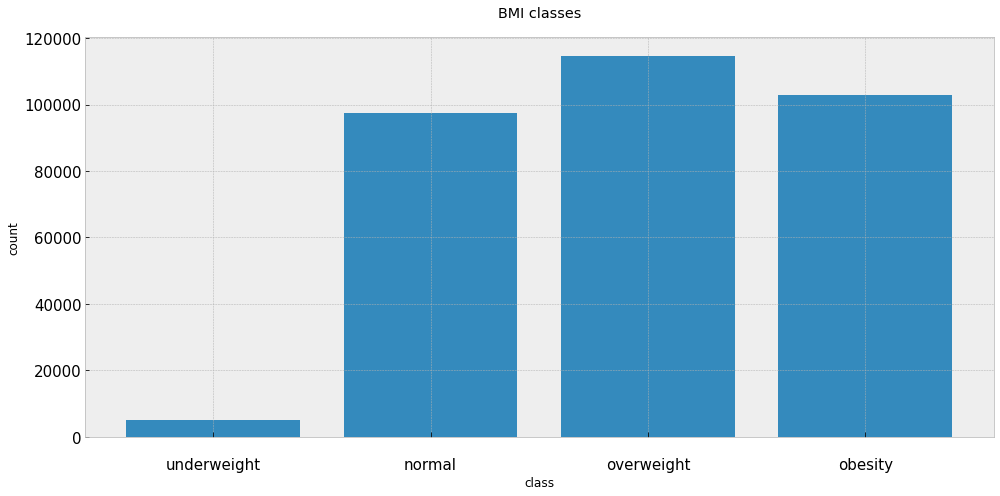

In [ ]:
keys, vals = zip(*bmi_classes.items())
counts = [sum(val) for val in vals]
plt.bar(keys, counts)
plt.title('BMI classes')
plt.xlabel("class")
plt.ylabel("count")
plt.show()

Surprisingly, most individuals in the dataset fall into the category of overweight or obesity, but there are very few instances of underweight. 

### **Sex**

In [ ]:
df['Sex'].describe()

count     319795
unique         2
top       Female
freq      167805
Name: Sex, dtype: object

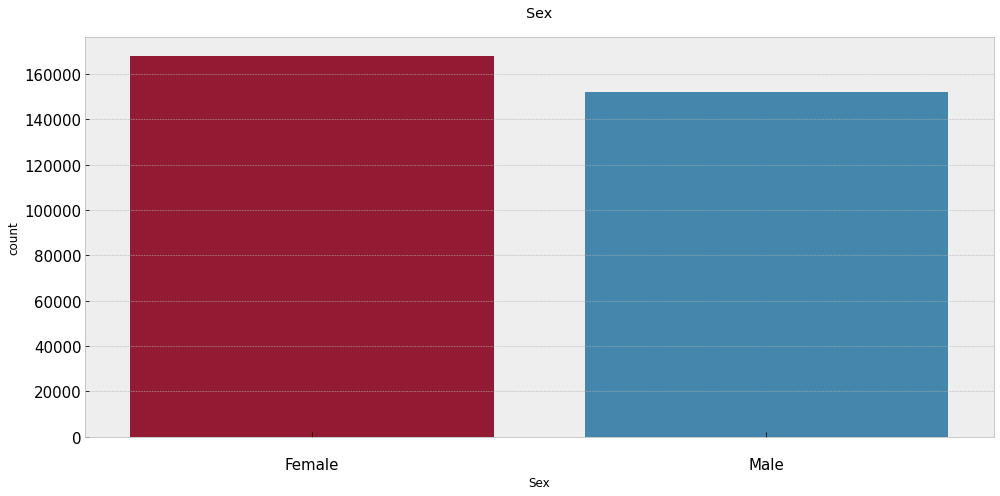

In [ ]:
plot_boolbar('Sex','Sex',(colors[1], colors[0]))

### **Race**

In [ ]:
df['Race'].describe()

count     319795
unique         6
top        White
freq      245212
Name: Race, dtype: object

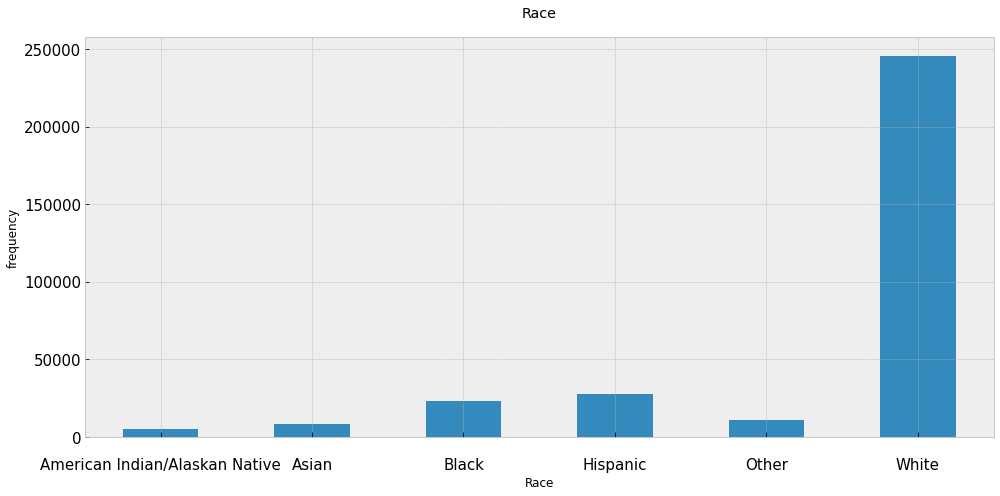

In [ ]:
plot_bar('Race','Race')

Highly imbalanced variable. Most people in the dataset are white, while other categories are scarce.

### **Smoking**

Somewhat vague name, but this variable indicates if a person has smoked at least 100 cigarettes in their lifetime.

In [ ]:
df['Smoking'].describe()

count     319795
unique         2
top           No
freq      187887
Name: Smoking, dtype: object

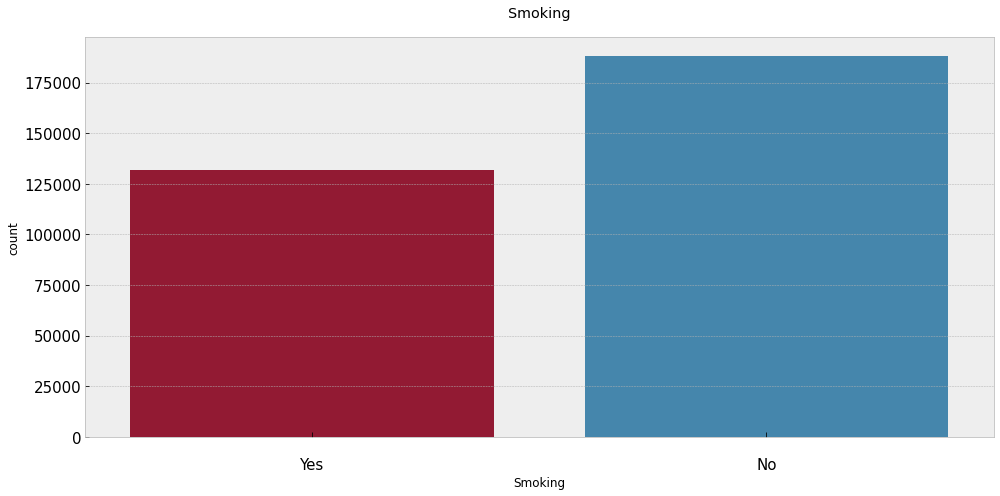

In [ ]:
plot_boolbar('Smoking','Smoking',(colors[1], colors[0]))

### **Alcohol Drinking**

A variable indicating if someone is a heavy drinker. For a man  defined as having more than 14 drinks per week and for women as having more than 7 drinks per week.

In [ ]:
df['AlcoholDrinking'].describe()

count     319795
unique         2
top           No
freq      298018
Name: AlcoholDrinking, dtype: object

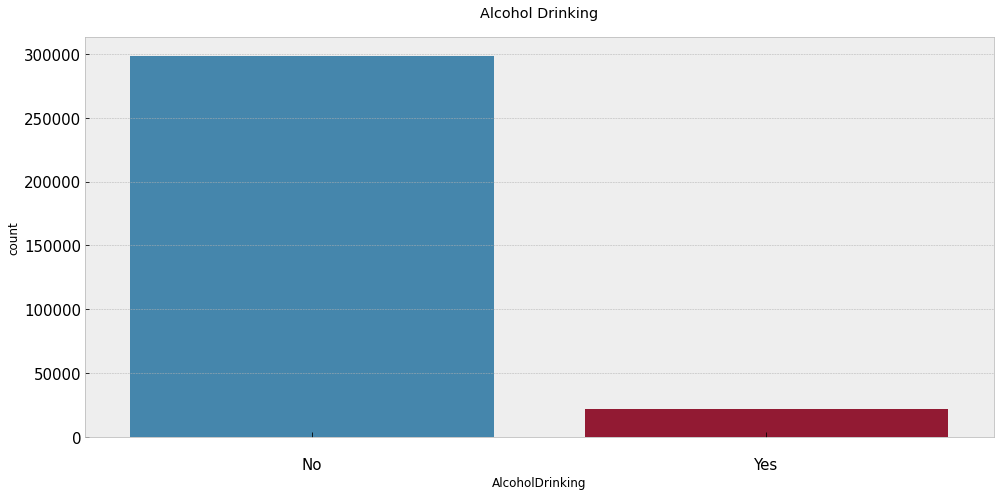

In [ ]:
plot_boolbar('AlcoholDrinking','Alcohol Drinking')

### **Sleep Time**

Average hours of sleep in a 24-hour period.

In [ ]:
df['SleepTime'].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [ ]:
shape('SleepTime')

Skewness: 0.6790314357818186
Kurtosis: 7.854726994730125
Variation: 2.062109830894998        
Mode: ModeResult(mode=array([7.]), count=array([97751]))
MAD: 1.4826
Rage: 23.0


In [ ]:
df.loc[df['SleepTime'].idxmax()]

HeartDisease                                    No
BMI                                          28.15
Smoking                                        Yes
AlcoholDrinking                                 No
Stroke                                          No
PhysicalHealth                                 7.0
MentalHealth                                  30.0
DiffWalking                                     No
Sex                                         Female
AgeCategory                                  55-59
Race                American Indian/Alaskan Native
Diabetic                                        No
PhysicalActivity                               Yes
GenHealth                                Very good
SleepTime                                     24.0
Asthma                                          No
KidneyDisease                                   No
SkinCancer                                      No
Name: 12339, dtype: object

In [ ]:
df.loc[df['SleepTime'].idxmin()]

HeartDisease               No
BMI                     32.95
Smoking                    No
AlcoholDrinking            No
Stroke                     No
PhysicalHealth           30.0
MentalHealth              0.0
DiffWalking               Yes
Sex                    Female
AgeCategory             40-44
Race                    Black
Diabetic                   No
PhysicalActivity          Yes
GenHealth           Excellent
SleepTime                 1.0
Asthma                     No
KidneyDisease              No
SkinCancer                 No
Name: 581, dtype: object

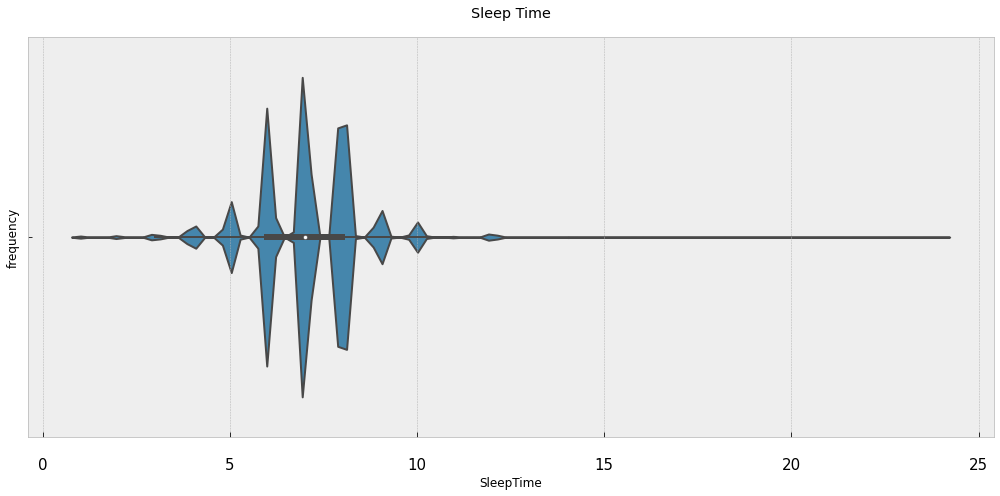

In [ ]:
plot_violin('SleepTime','Sleep Time')

It's hard to believe that some people get an average of 1 or 24 hours of sleep a day.

### **Physical Activity**

Physical activity or exercise other than regular job in 30 days before the interview.

In [ ]:
df['PhysicalActivity'].describe()

count     319795
unique         2
top          Yes
freq      247957
Name: PhysicalActivity, dtype: object

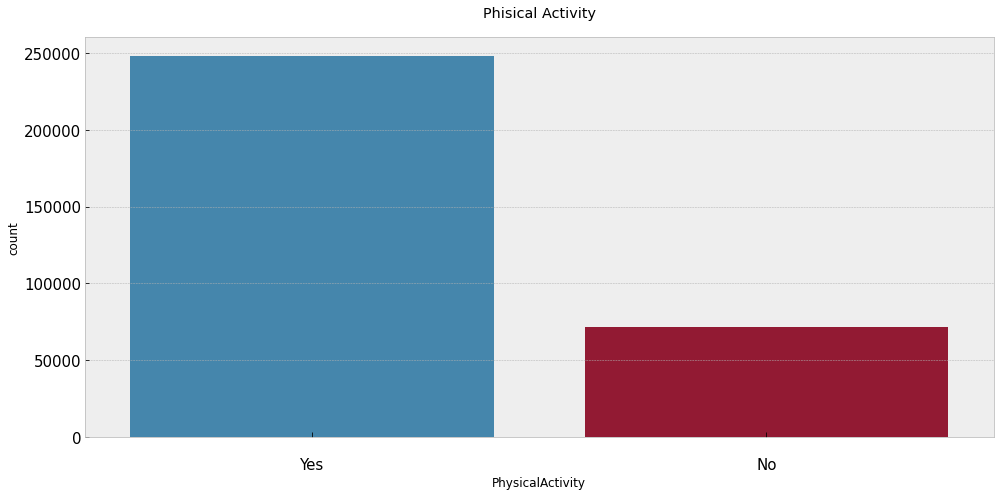

In [ ]:
plot_boolbar('PhysicalActivity','Phisical Activity')

## **Health Condition**

### **General Health**

Self reported health status.

In [ ]:
df['GenHealth'].describe()

count        319795
unique            5
top       Very good
freq         113858
Name: GenHealth, dtype: object

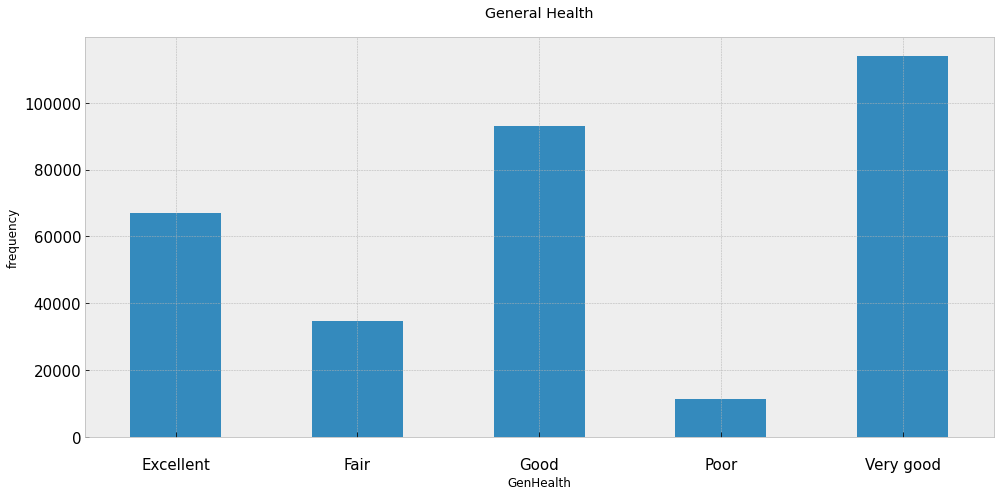

In [ ]:
plot_bar('GenHealth','General Health')

### **Physical Health**

Self reported days with poor physical health (including injuries) in period of 30 days before the interview.

In [ ]:
df['PhysicalHealth'].describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

In [ ]:
shape('PhysicalHealth')

Skewness: 2.603961048282941
Kurtosis: 5.52834443931836
Variation: 63.21582094900032        
Mode: ModeResult(mode=array([0.]), count=array([226589]))
MAD: 0.0
Rage: 30.0


In [ ]:
df.loc[df['PhysicalHealth'].idxmax()]

HeartDisease          Yes
BMI                  34.3
Smoking               Yes
AlcoholDrinking        No
Stroke                 No
PhysicalHealth       30.0
MentalHealth          0.0
DiffWalking           Yes
Sex                  Male
AgeCategory         60-64
Race                White
Diabetic              Yes
PhysicalActivity       No
GenHealth            Poor
SleepTime            15.0
Asthma                Yes
KidneyDisease          No
SkinCancer             No
Name: 10, dtype: object

In [ ]:
df.loc[df['PhysicalHealth'].idxmin()]

HeartDisease                 No
BMI                       20.34
Smoking                      No
AlcoholDrinking              No
Stroke                      Yes
PhysicalHealth              0.0
MentalHealth                0.0
DiffWalking                  No
Sex                      Female
AgeCategory         80 or older
Race                      White
Diabetic                     No
PhysicalActivity            Yes
GenHealth             Very good
SleepTime                   7.0
Asthma                       No
KidneyDisease                No
SkinCancer                   No
Name: 1, dtype: object

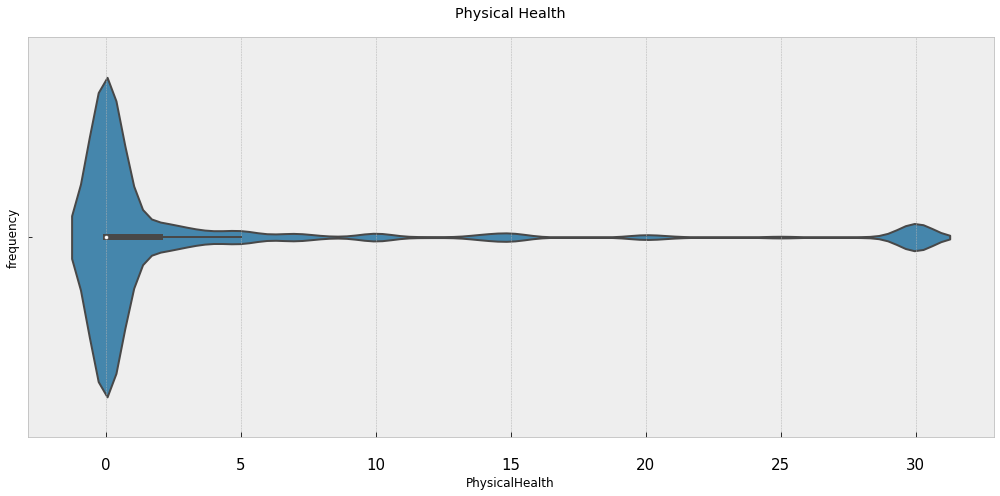

In [ ]:
plot_violin('PhysicalHealth','Physical Health')

### **Mental Health**

Self reported days with poor mental health in period of 30 days before the interview.

In [ ]:
df['MentalHealth'].describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [ ]:
shape('MentalHealth')

Skewness: 2.3311006150318807
Kurtosis: 4.403849003140337
Variation: 63.28556949392131        
Mode: ModeResult(mode=array([0.]), count=array([205401]))
MAD: 0.0
Rage: 30.0


In [ ]:
df.loc[df['MentalHealth'].idxmax()]

HeartDisease               No
BMI                      16.6
Smoking                   Yes
AlcoholDrinking            No
Stroke                     No
PhysicalHealth            3.0
MentalHealth             30.0
DiffWalking                No
Sex                    Female
AgeCategory             55-59
Race                    White
Diabetic                  Yes
PhysicalActivity          Yes
GenHealth           Very good
SleepTime                 5.0
Asthma                    Yes
KidneyDisease              No
SkinCancer                Yes
Name: 0, dtype: object

In [ ]:
df.loc[df['MentalHealth'].idxmin()]

HeartDisease                 No
BMI                       20.34
Smoking                      No
AlcoholDrinking              No
Stroke                      Yes
PhysicalHealth              0.0
MentalHealth                0.0
DiffWalking                  No
Sex                      Female
AgeCategory         80 or older
Race                      White
Diabetic                     No
PhysicalActivity            Yes
GenHealth             Very good
SleepTime                   7.0
Asthma                       No
KidneyDisease                No
SkinCancer                   No
Name: 1, dtype: object

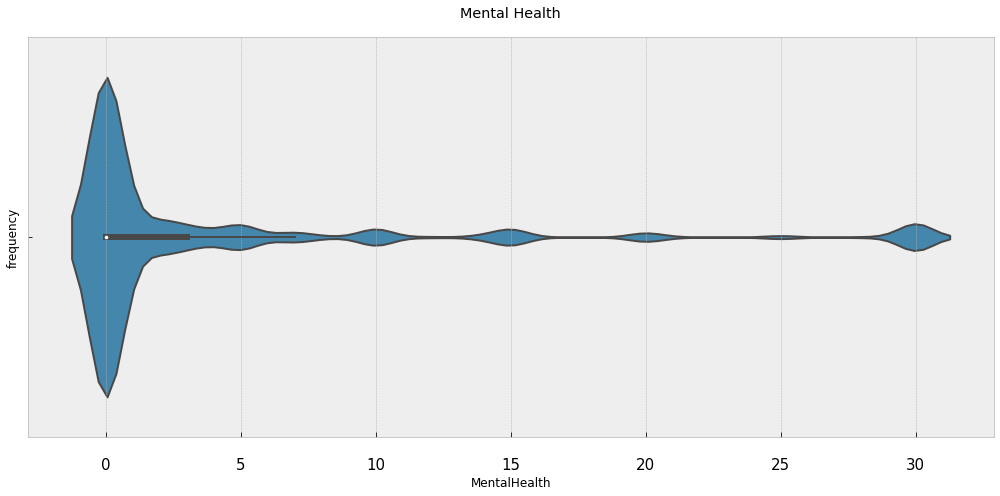

In [ ]:
plot_violin("MentalHealth",'Mental Health')

### **Stroke**

In [ ]:
df['Stroke'].describe()

count     319795
unique         2
top           No
freq      307726
Name: Stroke, dtype: object

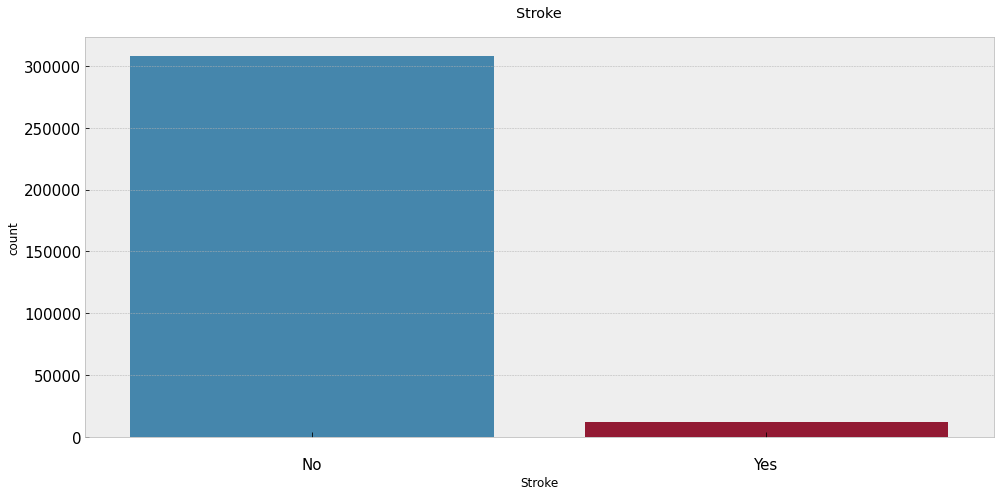

In [ ]:
plot_boolbar('Stroke','Stroke')

### **Difficulty Walking**

Difficulty walking or climbing stairs

In [ ]:
df['DiffWalking'].describe()

count     319795
unique         2
top           No
freq      275385
Name: DiffWalking, dtype: object

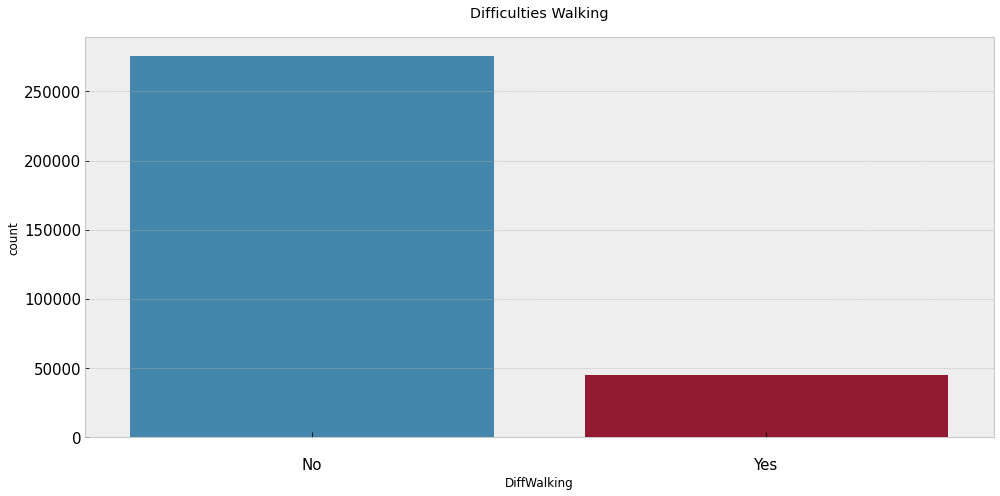

In [ ]:
plot_boolbar('DiffWalking','Difficulties Walking')

### **Asthma**

In [ ]:
df['Asthma'].describe()

count     319795
unique         2
top           No
freq      276923
Name: Asthma, dtype: object

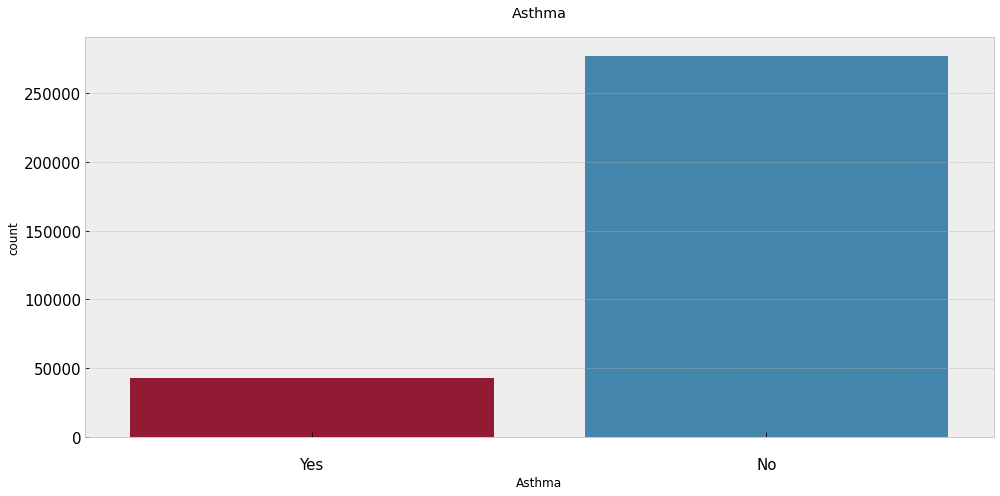

In [ ]:
plot_boolbar('Asthma','Asthma',(colors[1], colors[0]))

### **Kidney Disease**

Not including kidney stones, bladder infection or incontinence.

In [ ]:
df['KidneyDisease'].describe()

count     319795
unique         2
top           No
freq      308016
Name: KidneyDisease, dtype: object

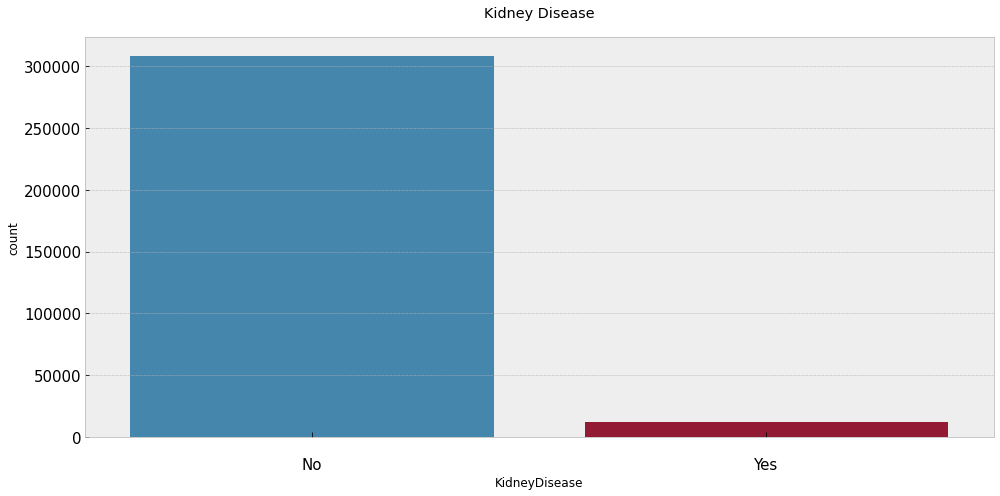

In [ ]:
plot_boolbar('KidneyDisease','Kidney Disease')

### **Skin Cancer**

In [ ]:
df['SkinCancer'].describe()

count     319795
unique         2
top           No
freq      289976
Name: SkinCancer, dtype: object

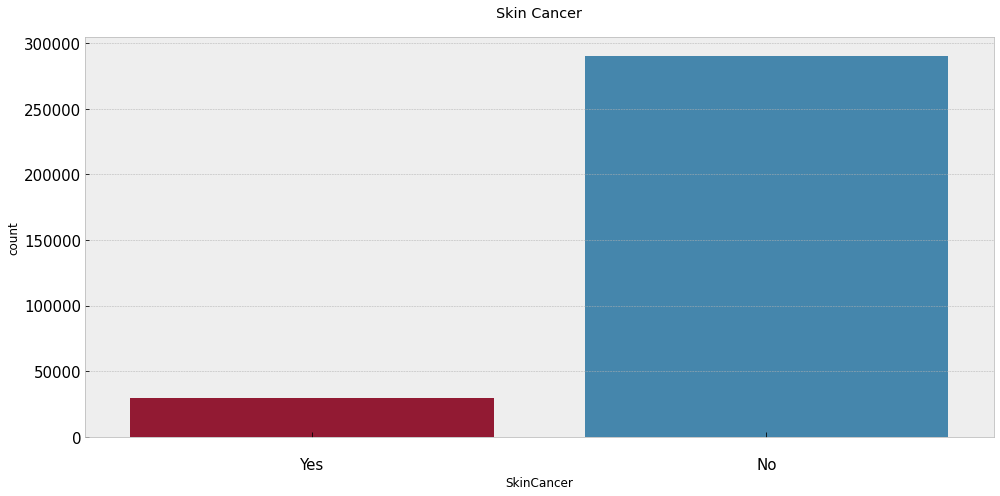

In [ ]:
plot_boolbar('SkinCancer','Skin Cancer',(colors[1], colors[0]))

### **Diabetic**

In [ ]:
df['Diabetic'].describe()

count     319795
unique         4
top           No
freq      269653
Name: Diabetic, dtype: object

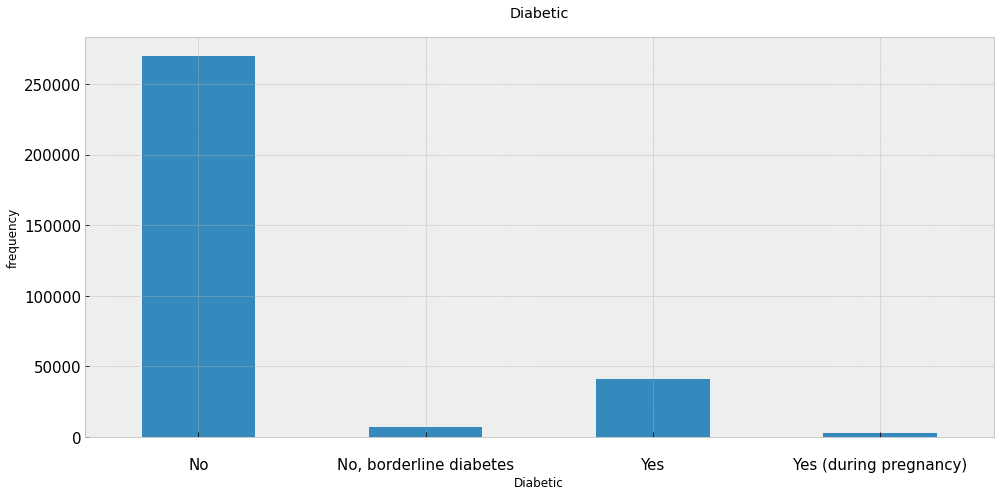

In [ ]:
plot_bar('Diabetic','Diabetic')

## **Findings**
The dataset altought having no missing values is highly imbalanced, some variables have lots of rare categories and outliers.